In [ ]:
# Traditional ML Models for Sentiment Analysis
# Person A - Social Media Computing Assignment

# Import libraries
import pandas as pd
import numpy as np
import pickle
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Import evaluation functions
from evaluation_utils import evaluate_model, plot_confusion_matrix

# Set random seed
np.random.seed(42)

In [ ]:
print("Traditional ML Models - Person A")
print("="*50)

# Load preprocessed data
print("Loading preprocessed data...")

# Load TF-IDF vectors
with open('data/X_train_tfidf.pkl', 'rb') as f:
    X_train_tfidf = pickle.load(f)

with open('data/X_test_tfidf.pkl', 'rb') as f:
    X_test_tfidf = pickle.load(f)

with open('data/tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)

# Load labels
y_train = pd.read_csv('data/y_train.csv')['label_numeric'].values
y_test = pd.read_csv('data/y_test.csv')['label_numeric'].values

print(f"Training data shape: {X_train_tfidf.shape}")
print(f"Testing data shape: {X_test_tfidf.shape}")
print(f"Training labels: {len(y_train)}")
print(f"Testing labels: {len(y_test)}")

In [ ]:
# Check class distribution
print(f"\nClass distribution in training:")
unique, counts = np.unique(y_train, return_counts=True)
for label, count in zip(unique, counts):
    sentiment = ['Negative', 'Neutral', 'Positive'][label]
    print(f"{sentiment} ({label}): {count} samples ({count/len(y_train)*100:.1f}%)")

# Visualize class distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
labels = ['Negative', 'Neutral', 'Positive']
train_counts = [np.sum(y_train == i) for i in range(3)]
plt.bar(labels, train_counts, color=['red', 'gray', 'green'], alpha=0.7)
plt.title('Training Set Class Distribution')
plt.ylabel('Count')
for i, count in enumerate(train_counts):
    plt.text(i, count + 50, str(count), ha='center')

plt.subplot(1, 2, 2)
test_counts = [np.sum(y_test == i) for i in range(3)]
plt.bar(labels, test_counts, color=['red', 'gray', 'green'], alpha=0.7)
plt.title('Test Set Class Distribution')
plt.ylabel('Count')
for i, count in enumerate(test_counts):
    plt.text(i, count + 10, str(count), ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Model 1: Logistic Regression
print("\n" + "="*50)
print("TRAINING LOGISTIC REGRESSION")
print("="*50)

# Train logistic regression
lr_model = LogisticRegression(
    C=1.0,                    # Regularization strength
    max_iter=1000,            # Max iterations
    random_state=42,
    class_weight='balanced'   # Handle class imbalance
)

print("Training Logistic Regression...")
lr_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluate
lr_results = evaluate_model(y_test, y_pred_lr, "Logistic Regression")

# Cross-validation score
cv_scores_lr = cross_val_score(lr_model, X_train_tfidf, y_train, cv=5, scoring='f1_weighted')
print(f"Cross-validation F1 score: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std() * 2:.4f})")

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_lr, title="Logistic Regression - Confusion Matrix")

# Save model
joblib.dump(lr_model, 'models/traditional_ml/logistic_regression.pkl')
print("Saved: models/traditional_ml/logistic_regression.pkl")

In [ ]:
# Model 2: Random Forest
print("\n" + "="*50)
print("TRAINING RANDOM FOREST")
print("="*50)

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,         # Number of trees
    max_depth=None,           # No limit on depth
    min_samples_split=5,      # Min samples to split
    min_samples_leaf=2,       # Min samples in leaf
    random_state=42,
    class_weight='balanced',  # Handle class imbalance
    n_jobs=-1                 # Use all CPU cores
)

print("Training Random Forest...")
rf_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate
rf_results = evaluate_model(y_test, y_pred_rf, "Random Forest")

# Cross-validation score
cv_scores_rf = cross_val_score(rf_model, X_train_tfidf, y_train, cv=5, scoring='f1_weighted')
print(f"Cross-validation F1 score: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std() * 2:.4f})")

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_rf, title="Random Forest - Confusion Matrix")

# Feature importance (top 20 words)
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_importance = rf_model.feature_importances_
top_indices = np.argsort(feature_importance)[-20:][::-1]

print("\nTop 20 Most Important Features (Words):")
for i, idx in enumerate(top_indices):
    print(f"{i+1:2d}. {feature_names[idx]:15s} - {feature_importance[idx]:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
top_features = [feature_names[i] for i in top_indices]
top_importance = [feature_importance[i] for i in top_indices]
plt.barh(range(len(top_features)), top_importance)
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Feature Importance')
plt.title('Top 20 Most Important Features - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Save model
joblib.dump(rf_model, 'models/traditional_ml/random_forest.pkl')
print("Saved: models/traditional_ml/random_forest.pkl")

Traditional ML Models - Person A
Loading preprocessed data...
Training data shape: (11712, 3453)
Testing data shape: (2928, 3453)
Training labels: 11712
Testing labels: 2928

Class distribution in training:
Negative (0): 7343 samples (62.7%)
Neutral (1): 2479 samples (21.2%)
Positive (2): 1890 samples (16.1%)


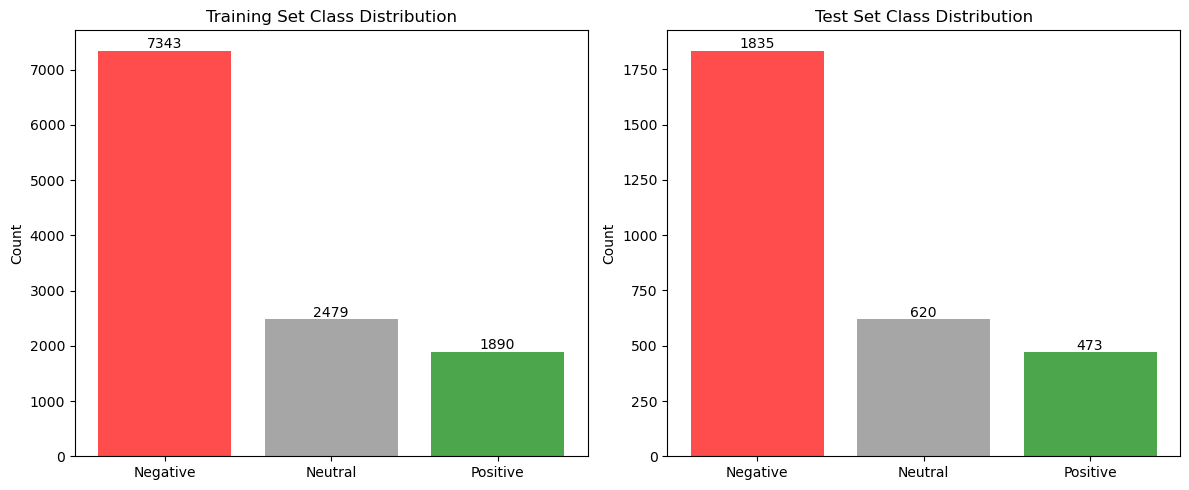


TRAINING LOGISTIC REGRESSION
Training Logistic Regression...

Logistic Regression Results:
Accuracy: 0.7473
F1-Score (weighted): 0.7559
Precision (weighted): 0.7743
Recall (weighted): 0.7473
Cross-validation F1 score: 0.7560 (+/- 0.0034)


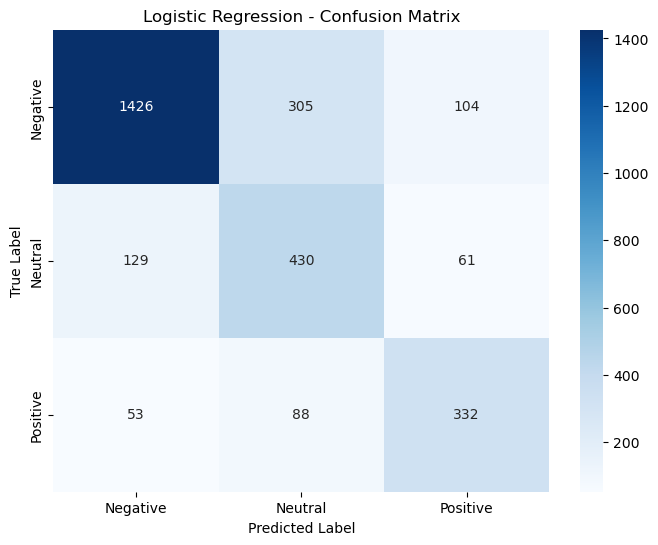

Saved: models/traditional_ml/logistic_regression.pkl

TRAINING RANDOM FOREST
Training Random Forest...

Random Forest Results:
Accuracy: 0.7449
F1-Score (weighted): 0.7500
Precision (weighted): 0.7584
Recall (weighted): 0.7449
Cross-validation F1 score: 0.7427 (+/- 0.0107)


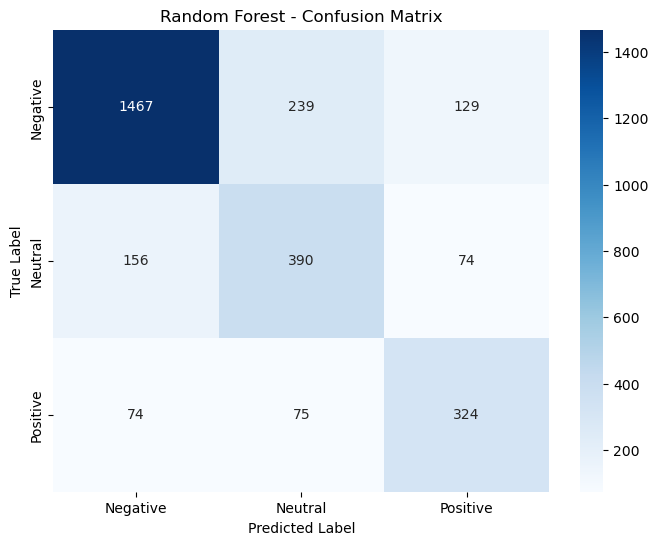


Top 20 Most Important Features (Words):
 1. thanks          - 0.0725
 2. thank           - 0.0662
 3. great           - 0.0263
 4. hours           - 0.0146
 5. awesome         - 0.0131
 6. love            - 0.0123
 7. hold            - 0.0111
 8. delayed         - 0.0111
 9. hour            - 0.0107
10. best            - 0.0099
11. flight          - 0.0098
12. cancelled       - 0.0084
13. amazing         - 0.0079
14. worst           - 0.0073
15. appreciate      - 0.0068
16. airline         - 0.0067
17. good            - 0.0064
18. customer        - 0.0063
19. dm              - 0.0062
20. waiting         - 0.0059


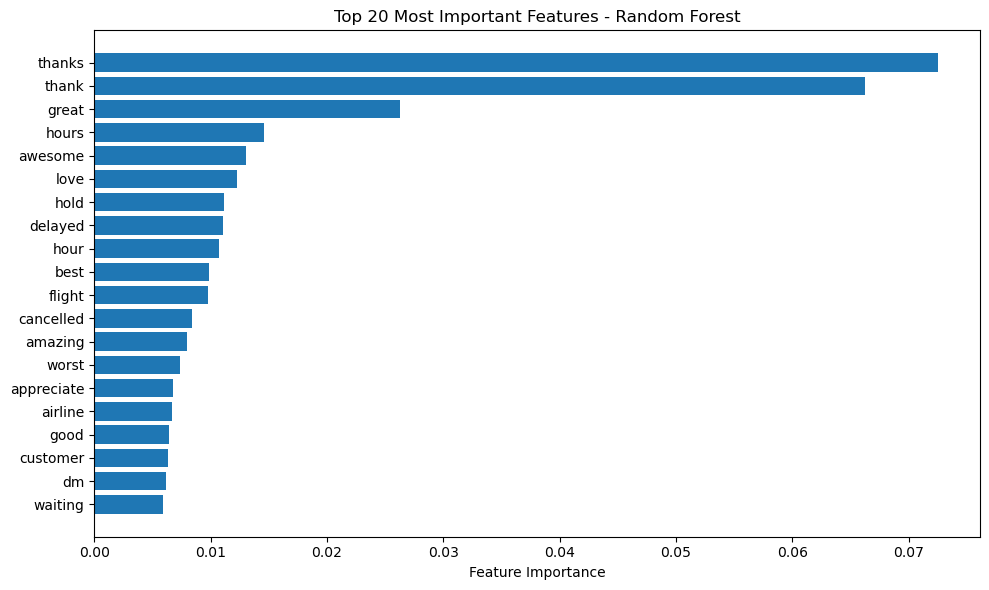

Saved: models/traditional_ml/random_forest.pkl

TRAINING SUPPORT VECTOR MACHINE
Training SVM (this may take a few minutes)...

Support Vector Machine Results:
Accuracy: 0.7715
F1-Score (weighted): 0.7754
Precision (weighted): 0.7823
Recall (weighted): 0.7715
Running cross-validation (using subset for speed)...
Cross-validation F1 score (subset): 0.7240 (+/- 0.0137)


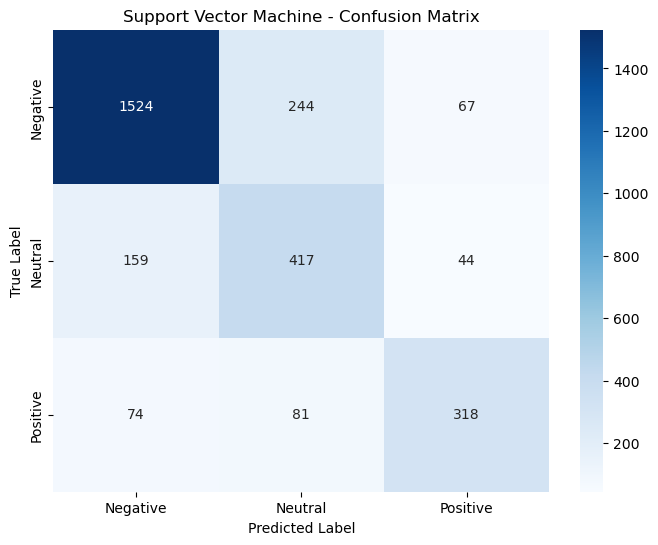

Saved: models/traditional_ml/svm.pkl

MODEL COMPARISON SUMMARY

Performance Comparison:
                    Model  Accuracy  F1-Score  Precision  Recall
0     Logistic Regression    0.7473    0.7559     0.7743  0.7473
1           Random Forest    0.7449    0.7500     0.7584  0.7449
2  Support Vector Machine    0.7715    0.7754     0.7823  0.7715

Best performing model: Support Vector Machine (F1-Score: 0.7754)


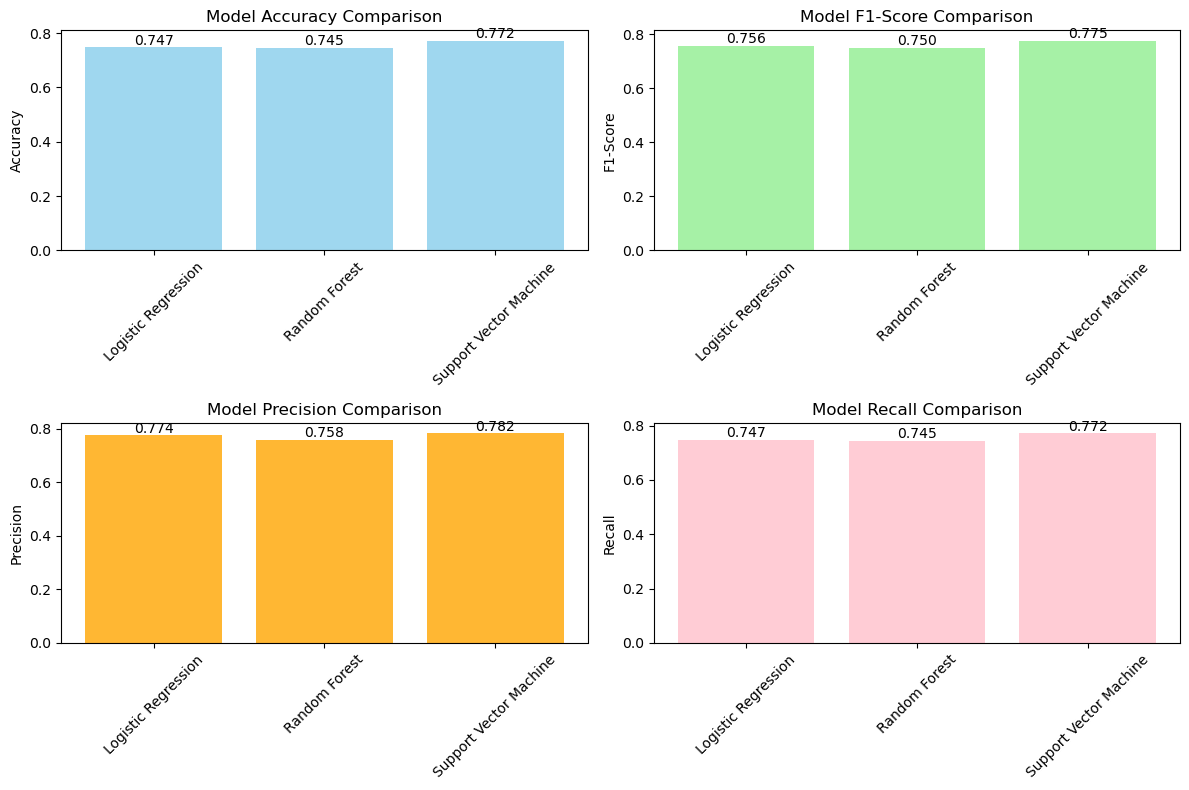


Saved: models/traditional_ml/model_comparison.csv

EXAMPLE PREDICTIONS
Using Support Vector Machine for example predictions:
--------------------------------------------------
Text 1: 'The flight was amazing and the crew was very helpful!'
Prediction: Positive (confidence: 0.973)

Text 2: 'Terrible service, delayed flight, worst experience ever.'
Prediction: Negative (confidence: 0.996)

Text 3: 'The flight was okay, nothing special but not bad either.'
Prediction: Negative (confidence: 0.740)

Text 4: 'Love flying with this airline, always on time!'
Prediction: Positive (confidence: 0.941)

Text 5: 'Can't believe how rude the staff was today.'
Prediction: Negative (confidence: 0.936)


FEATURE ANALYSIS

TRADITIONAL ML MODELS COMPLETE!

Summary:
- Trained 3 traditional ML models (Logistic Regression, Random Forest, SVM)
- Best model: Support Vector Machine (F1-Score: 0.7754)
- All models saved in models/traditional_ml/
- Ready for comparison with Person B's deep learning models
Saved:

In [ ]:
# Model 3: Support Vector Machine
print("\n" + "="*50)
print("TRAINING SUPPORT VECTOR MACHINE")
print("="*50)

# Train SVM (using smaller C for faster training)
svm_model = SVC(
    C=1.0,                    # Regularization parameter
    kernel='rbf',             # RBF kernel
    gamma='scale',            # Kernel coefficient
    random_state=42,
    class_weight='balanced',  # Handle class imbalance
    probability=True          # Enable probability predictions
)

print("Training SVM (this may take a few minutes)...")
svm_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate
svm_results = evaluate_model(y_test, y_pred_svm, "Support Vector Machine")

# Cross-validation score (using smaller subset for speed)
print("Running cross-validation (using subset for speed)...")
subset_size = 3000
subset_indices = np.random.choice(X_train_tfidf.shape[0], subset_size, replace=False)
X_subset = X_train_tfidf[subset_indices]
y_subset = y_train[subset_indices]
cv_scores_svm = cross_val_score(svm_model, X_subset, y_subset, cv=3, scoring='f1_weighted')
print(f"Cross-validation F1 score (subset): {cv_scores_svm.mean():.4f} (+/- {cv_scores_svm.std() * 2:.4f})")

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_svm, title="Support Vector Machine - Confusion Matrix")

# Save model
joblib.dump(svm_model, 'models/traditional_ml/svm.pkl')
print("Saved: models/traditional_ml/svm.pkl")

# Model Comparison
print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)

# Collect all results
all_results = [lr_results, rf_results, svm_results]

# Create comparison DataFrame
comparison_data = []
for result in all_results:
    comparison_data.append({
        'Model': result['model_name'],
        'Accuracy': result['accuracy'],
        'F1-Score': result['f1_weighted'],
        'Precision': result['precision'],
        'Recall': result['recall']
    })

comparison_df = pd.DataFrame(comparison_data)
print("\nPerformance Comparison:")
print(comparison_df.round(4))

# Find best model
best_model_idx = comparison_df['F1-Score'].idxmax()
best_model = comparison_df.iloc[best_model_idx]['Model']
best_f1 = comparison_df.iloc[best_model_idx]['F1-Score']
print(f"\nBest performing model: {best_model} (F1-Score: {best_f1:.4f})")

# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Accuracy comparison
axes[0, 0].bar(comparison_df['Model'], comparison_df['Accuracy'], color='skyblue', alpha=0.8)
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(comparison_df['Accuracy']):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center')

# F1-Score comparison
axes[0, 1].bar(comparison_df['Model'], comparison_df['F1-Score'], color='lightgreen', alpha=0.8)
axes[0, 1].set_title('Model F1-Score Comparison')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(comparison_df['F1-Score']):
    axes[0, 1].text(i, v + 0.01, f'{v:.3f}', ha='center')

# Precision comparison
axes[1, 0].bar(comparison_df['Model'], comparison_df['Precision'], color='orange', alpha=0.8)
axes[1, 0].set_title('Model Precision Comparison')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(comparison_df['Precision']):
    axes[1, 0].text(i, v + 0.01, f'{v:.3f}', ha='center')

# Recall comparison
axes[1, 1].bar(comparison_df['Model'], comparison_df['Recall'], color='pink', alpha=0.8)
axes[1, 1].set_title('Model Recall Comparison')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(comparison_df['Recall']):
    axes[1, 1].text(i, v + 0.01, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

# Save comparison results
comparison_df.to_csv('models/traditional_ml/model_comparison.csv', index=False)
print("\nSaved: models/traditional_ml/model_comparison.csv")

# Example predictions on new text
print("\n" + "="*60)
print("EXAMPLE PREDICTIONS")
print("="*60)

# Load the vectorizer and best model for demonstration
best_model_name = best_model.lower().replace(' ', '_')
if 'logistic' in best_model_name:
    demo_model = lr_model
elif 'random' in best_model_name:
    demo_model = rf_model
elif 'svm' in best_model_name or 'support' in best_model_name:
    demo_model = svm_model
else:
    demo_model = svm_model

# Example texts
example_texts = [
    "The flight was amazing and the crew was very helpful!",
    "Terrible service, delayed flight, worst experience ever.",
    "The flight was okay, nothing special but not bad either.",
    "Love flying with this airline, always on time!",
    "Can't believe how rude the staff was today."
]

print(f"Using {best_model} for example predictions:")
print("-" * 50)

# Apply preprocessing (simplified version)
from evaluation_utils import *
import re

def simple_preprocess(text):
    """Simple preprocessing for demo"""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

for i, text in enumerate(example_texts):
    # Preprocess
    clean_text = simple_preprocess(text)
    
    # Vectorize
    text_vector = tfidf_vectorizer.transform([clean_text])
    
    # Predict
    prediction = demo_model.predict(text_vector)[0]
    probability = demo_model.predict_proba(text_vector)[0]
    
    sentiment_labels = ['Negative', 'Neutral', 'Positive']
    predicted_sentiment = sentiment_labels[prediction]
    confidence = probability[prediction]
    
    print(f"Text {i+1}: '{text}'")
    print(f"Prediction: {predicted_sentiment} (confidence: {confidence:.3f})")
    print()

# Feature analysis - Most discriminative words
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# For logistic regression, we can analyze coefficients
if 'logistic' in best_model_name.lower():
    print("Most discriminative words (Logistic Regression coefficients):")
    print("-" * 50)
    
    # Get coefficients for each class
    coefs = lr_model.coef_
    
    for class_idx, class_name in enumerate(['Negative', 'Neutral', 'Positive']):
        print(f"\nTop words for {class_name} class:")
        
        # Get top positive coefficients (words that indicate this class)
        top_indices = np.argsort(coefs[class_idx])[-10:][::-1]
        for idx in top_indices:
            print(f"  {feature_names[idx]:15s} - {coefs[class_idx][idx]:.4f}")

print("\n" + "="*60)
print("TRADITIONAL ML MODELS COMPLETE!")
print("="*60)

# Summary
print(f"\nSummary:")
print(f"- Trained 3 traditional ML models (Logistic Regression, Random Forest, SVM)")
print(f"- Best model: {best_model} (F1-Score: {best_f1:.4f})")
print(f"- All models saved in models/traditional_ml/")
print(f"- Ready for comparison with Person B's deep learning models")

# Save final results for Person B
results_summary = {
    'best_model': best_model,
    'best_f1_score': best_f1,
    'all_results': comparison_df.to_dict('records'),
    'feature_count': len(feature_names),
    'test_accuracy': comparison_df.iloc[best_model_idx]['Accuracy']
}

with open('models/traditional_ml/results_summary.pkl', 'wb') as f:
    pickle.dump(results_summary, f)

print("Saved: models/traditional_ml/results_summary.pkl")
print("\n🎉 Person A's traditional ML work complete!")